# Dataset Building
---

In [ ]:
import os
import torch
import evaluate
import numpy as np
import matplotlib.pyplot as plt


from datasets import ClassLabel, DatasetDict, load_dataset
# from google.colab import drive

# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/MACKENZIE/projeto-aplicado-ii/')
plt.style.use('seaborn-v0_8-paper')

## Manipulação dos Dados

In [ ]:
files = ['dataset/NoThemeTweets.csv',
         'dataset/TweetsNeutralHash.csv',
         'dataset/TweetsNeutralNews.csv',
         'dataset/TweetsWithTheme.csv']

dataset = load_dataset('csv', data_files=files)
dataset = dataset['train']
dataset = dataset.remove_columns(column_names=['id', 'tweet_date', 'query_used'])
dataset = dataset.cast_column(column='sentiment', feature=ClassLabel(names=['Neutro', 'Positivo', 'Negativo']))

dataset

Generating train split: 0 examples [00:00, ? examples/s]

Casting the dataset:   0%|          | 0/900688 [00:00<?, ? examples/s]

Dataset({
    features: ['tweet_text', 'sentiment'],
    num_rows: 900688
})

In [ ]:
train_dataset, test_dataset = dataset.train_test_split(test_size=0.3,
                                                       stratify_by_column='sentiment',
                                                       shuffle=True,
                                                       seed=42).values()

dev_dataset, test_dataset = test_dataset.train_test_split(test_size=0.5,
                                                          stratify_by_column='sentiment',
                                                          shuffle=True,
                                                          seed=42).values()

In [ ]:
dataset = DatasetDict({'train': train_dataset,
                       'dev': dev_dataset,
                       'test': test_dataset})

dataset

DatasetDict({
    train: Dataset({
        features: ['tweet_text', 'sentiment'],
        num_rows: 630481
    })
    dev: Dataset({
        features: ['tweet_text', 'sentiment'],
        num_rows: 135103
    })
    test: Dataset({
        features: ['tweet_text', 'sentiment'],
        num_rows: 135104
    })
})

## Visualização dos Dados

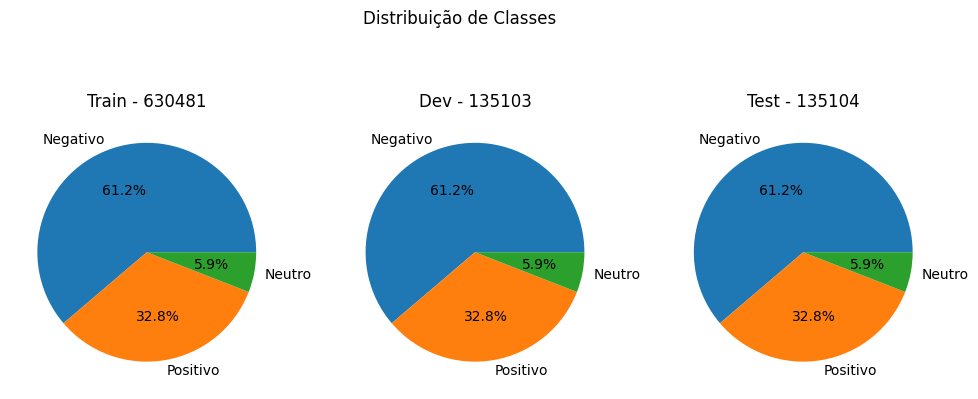

In [ ]:
def pie_plot(dataset, ax):
    df = dataset.to_pandas()
    class_counts = df['sentiment'].value_counts()
    class_percentages = (class_counts / class_counts.sum()) * 100

    out = ax.pie(class_percentages,
                 labels=class_percentages.index.map({0: 'Neutro', 1: 'Positivo', 2: 'Negativo'}),
                 autopct='%1.1f%%')

    return out

f, axes = plt.subplots(1, 3, figsize=(12, 5))

for key, ax in zip(dataset.keys(), axes):
    sentiment_pie_plot(dataset[key], ax)
    ax.set_title(f"{key.capitalize()} - {dataset[key].shape[0]}")

f.suptitle("Distribuição de Classes")
plt.show()